<a href="https://colab.research.google.com/github/Nikerlas/AI/blob/main/ClusteringWML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np #linear algebra
import pandas as pd #creating and manipulating dataframes
import matplotlib.pyplot as plt #visuals
import seaborn as sns #visuals

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, Birch
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.preprocessing import StandardScaler #scaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA

In [33]:
data = pd.read_csv('CC GENERAL.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [34]:
# Convert 'country' column to categorical and then to numerical
le = LabelEncoder()
data['CUST_ID'] = le.fit_transform(data['CUST_ID'])

<Axes: >

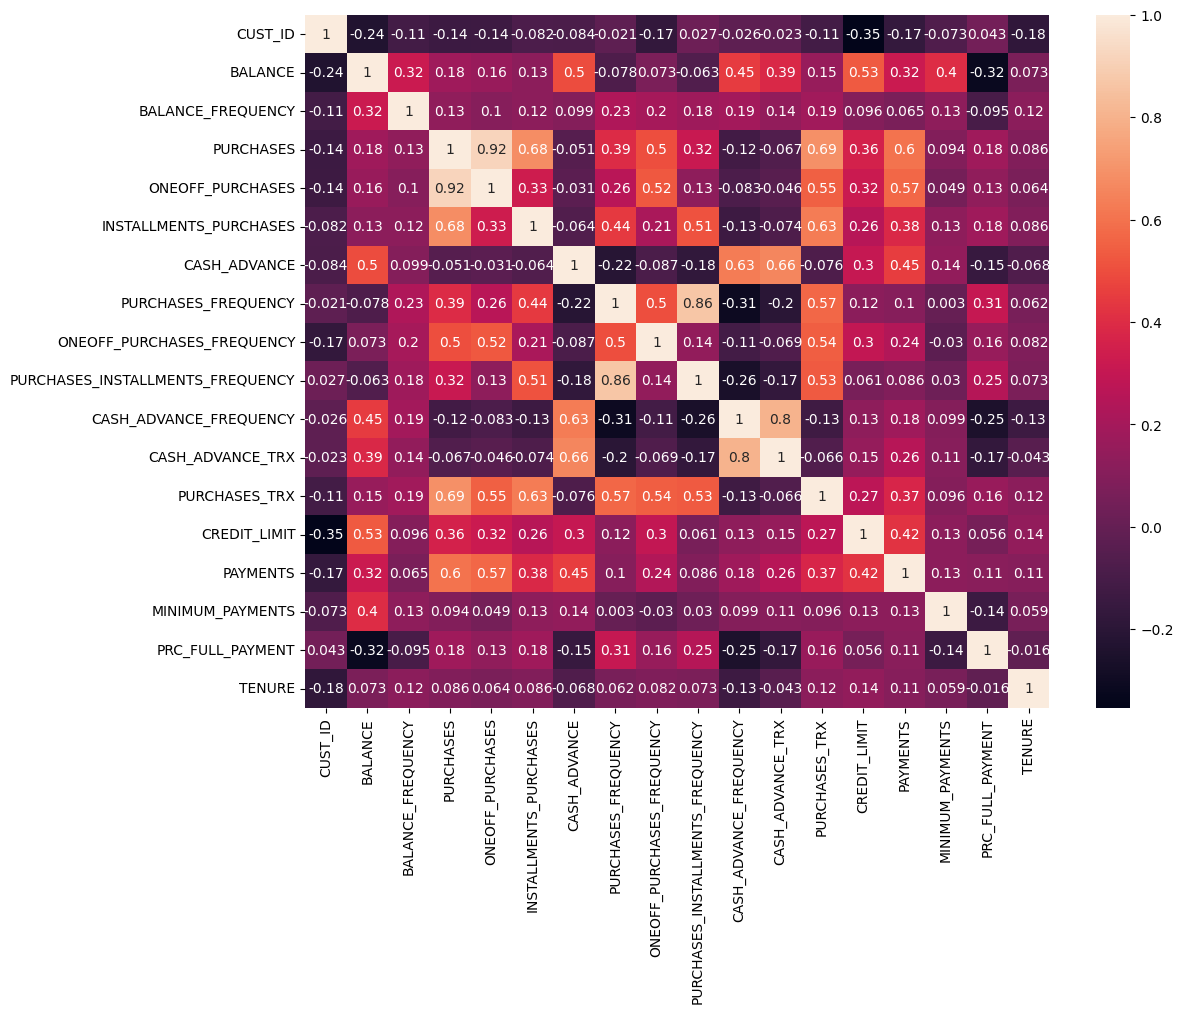

In [35]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)

In [36]:
columns_to_keep = ['PURCHASES', 'ONEOFF_PURCHASES']
data = data[columns_to_keep]

data.head()


,PURCHASES,ONEOFF_PURCHASES
0,95.40,0.00
1,0.00,0.00
2,773.17,773.17
3,1499.00,1499.00
4,16.00,16.00


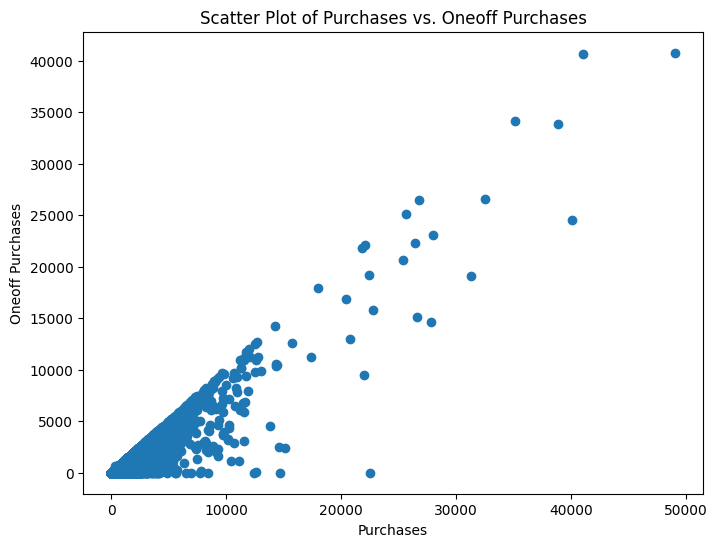

In [38]:
plt.figure(figsize=(8, 6))
plt.scatter(data['PURCHASES'], data['ONEOFF_PURCHASES'])
plt.xlabel('Purchases')
plt.ylabel('Oneoff Purchases')
plt.title('Scatter Plot of Purchases vs. Oneoff Purchases')
plt.show()


In [40]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [41]:
# Apply PCA for dimensionality reduction to 2 components
pca = PCA(n_components=2)
data_pca = pca.fit_transform(scaled_data)

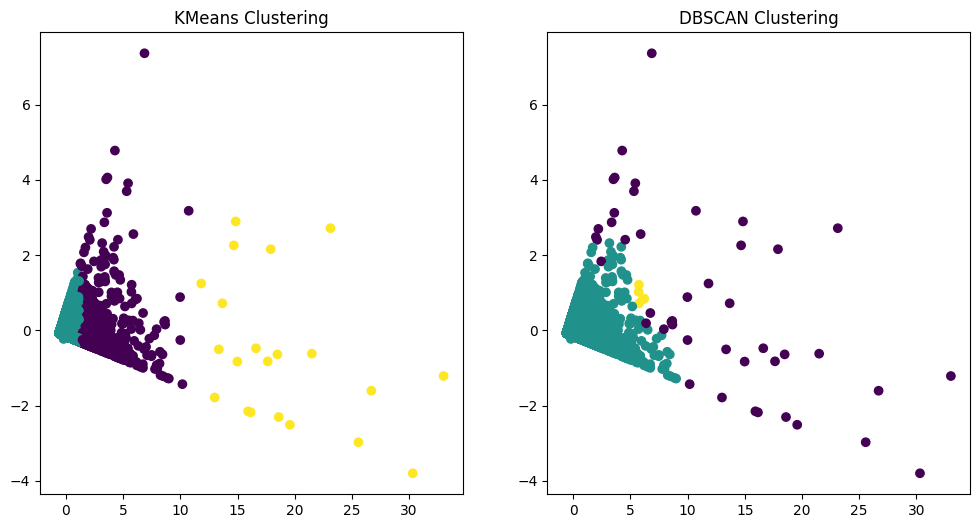

KMeans Silhouette Score: 0.8015766488327951
DBSCAN Silhouette Score: 0.8396516941570801


In [42]:
# prompt: use DBSCAN and KMEANS

import matplotlib.pyplot as plt
# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can adjust the number of clusters
kmeans_labels = kmeans.fit_predict(data_pca)

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You can adjust eps and min_samples
dbscan_labels = dbscan.fit_predict(data_pca)

# Visualize the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('KMeans Clustering')

plt.subplot(1, 2, 2)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')

plt.show()

# Evaluate the clustering (optional)
kmeans_silhouette = silhouette_score(data_pca, kmeans_labels)
dbscan_silhouette = silhouette_score(data_pca, dbscan_labels)

print(f"KMeans Silhouette Score: {kmeans_silhouette}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")
